In [1]:
# Q2
import numpy as np

def jacobi(A, b, x0, tol=1e-3, max_iter=500):
    """
    用 Jacobi 迭代法解 Ax=b
    A: 系数矩阵 (n×n)
    b: 常数项 (n维)
    x0: 初始猜测 (n维)
    tol: 终止阈值，对应无穷范数
    max_iter: 最大迭代次数
    返回 (解向量, 实际迭代次数)
    """
    n = len(b)
    x = x0.astype(float)
    # 分解对角线 D 和剩余 R
    D = np.diag(A)
    R = A - np.diagflat(D)
    
    for k in range(max_iter):
        x_new = (b - np.dot(R, x)) / D  # 这里的运算是按元素除
        
        print(f"Jacobi第{k+1}次迭代: {x_new}")
        
        if np.linalg.norm(x_new - x, ord=np.inf) < tol:
            return x_new, k+1
        x = x_new
    return x, max_iter

def sor(A, b, x0, w=1.2, tol=1e-3, max_iter=500):
    """
    用 SOR(超松弛)迭代法解 Ax=b
    w: 松弛因子
    其他参数含义同上
    """
    n = len(b)
    x = x0.astype(float)
    
    for k in range(max_iter):
        x_old = x.copy()
        for i in range(n):
            sigma = 0.0
            for j in range(n):
                if j < i:
                    sigma += A[i, j] * x[j]       # 使用本次迭代已更新的值
                elif j > i:
                    sigma += A[i, j] * x_old[j]   # 使用上次迭代的值
            x[i] = (1 - w) * x_old[i] + w * (b[i] - sigma) / A[i, i]
        # 打印每次迭代的结果
        print(f"SOR第{k+1}次迭代: {x}")
        # 判断收敛
        if np.linalg.norm(x - x_old, ord=np.inf) < tol:
            return x, k+1
    return x, max_iter

def main():
    # 系数矩阵 A (4×4)
    A = np.array([
        [ 3, -1,  1,  1],
        [-1,  4,  1, -1],
        [ 1,  1,  4, -1],
        [ 1, -1, -1,  5]
    ], dtype=float)
    
    # 常数项 b
    b = np.array([2, -2, -3, 5], dtype=float)
    
    # 初始猜测 x^(0) = (0, 0, 0, 1)
    x0 = np.array([0, 0, 0, 1], dtype=float)
    
    # 1) Jacobi 方法
    x_jacobi, iter_jacobi = jacobi(A, b, x0, tol=1e-3)
    print("Jacobi最终解 =", x_jacobi)
    print("Jacobi迭代次数 =", iter_jacobi)
    
    # 2) SOR 方法 (w=1.2)
    w = 1.2
    x_sor, iter_sor = sor(A, b, x0, w=w, tol=1e-3)
    print("SOR最终解 =", x_sor)
    print("SOR迭代次数 =", iter_sor)

if __name__ == "__main__":
    main()

Jacobi第1次迭代: [ 0.33333333 -0.25       -0.5         1.        ]
Jacobi第2次迭代: [ 0.41666667 -0.04166667 -0.52083333  0.78333333]
Jacobi第3次迭代: [ 0.56527778 -0.06979167 -0.64791667  0.80416667]
Jacobi第4次迭代: [ 0.59131944  0.00434028 -0.67282986  0.74340278]
Jacobi第5次迭代: [ 0.64458912  0.00188802 -0.71306424  0.74803819]
Jacobi第6次迭代: [ 0.65563802  0.02642289 -0.72460974  0.72884693]
Jacobi第7次迭代: [ 0.6740619   0.02727367 -0.73830349  0.72923503]
Jacobi第8次迭代: [ 0.67878071  0.0354001  -0.74302514  0.72298166]
Jacobi第9次迭代: [ 0.68514786  0.03619688 -0.74779979  0.72271885]
Jacobi第10次迭代: [ 0.68709261  0.03891663 -0.74965647  0.72064984]
Jacobi第11次迭代: [ 0.68930775  0.03934973 -0.75133985  0.72043351]
Jacobi第12次迭代: [ 0.69008536  0.04027028 -0.75205599  0.71974043]
Jacobi最终解 = [ 0.69008536  0.04027028 -0.75205599  0.71974043]
Jacobi迭代次数 = 12
SOR第1次迭代: [ 0.4     -0.18    -0.666    0.70096]
SOR第2次迭代: [ 0.634016    0.0362928  -0.75760464  0.73452932]
SOR第3次迭代: [ 0.69694405  0.04946484 -0.75204294  0.71720

In [2]:
# Q3
import numpy as np

def f(x):
    return np.sin(x)/x

def fprime_exact(x):
    return (x*np.cos(x)-np.sin(x))/x**2

x0 = 2.0
exact_value = fprime_exact(x0)

# 选取一系列步长 h
h_values = [2**(-n) for n in range(1, 8)]  # 例如从 1/2, 1/4, ..., 1/128

print("  h          Approx Derivative        Error          Error Ratio")
prev_error = None
for h in h_values:
    # 中心差分公式
    approx = (f(x0 + h) - f(x0 - h)) / (2.0 * h)
    error = abs(approx - exact_value)
    # 计算相邻误差比 (用于观察是否 ~ 1/4)
    ratio = None
    if prev_error is not None:
        ratio = prev_error / error
    print(f"{h:8.6f}  {approx:22.15f}  {error:12.5e}", end='')
    if ratio is not None:
        print(f"    {ratio:8.3f}")
    else:
        print()
    prev_error = error

  h          Approx Derivative        Error          Error Ratio
0.500000      -0.425607800094454   9.78997e-03
0.250000      -0.432934748399998   2.46303e-03       3.975
0.125000      -0.434781043462026   6.16732e-04       3.994
0.062500      -0.435243531107183   1.54244e-04       3.998
0.031250      -0.435359210198710   3.85648e-05       4.000
0.015625      -0.435388133546338   9.64143e-06       4.000
0.007812      -0.435395364606681   2.41037e-06       4.000


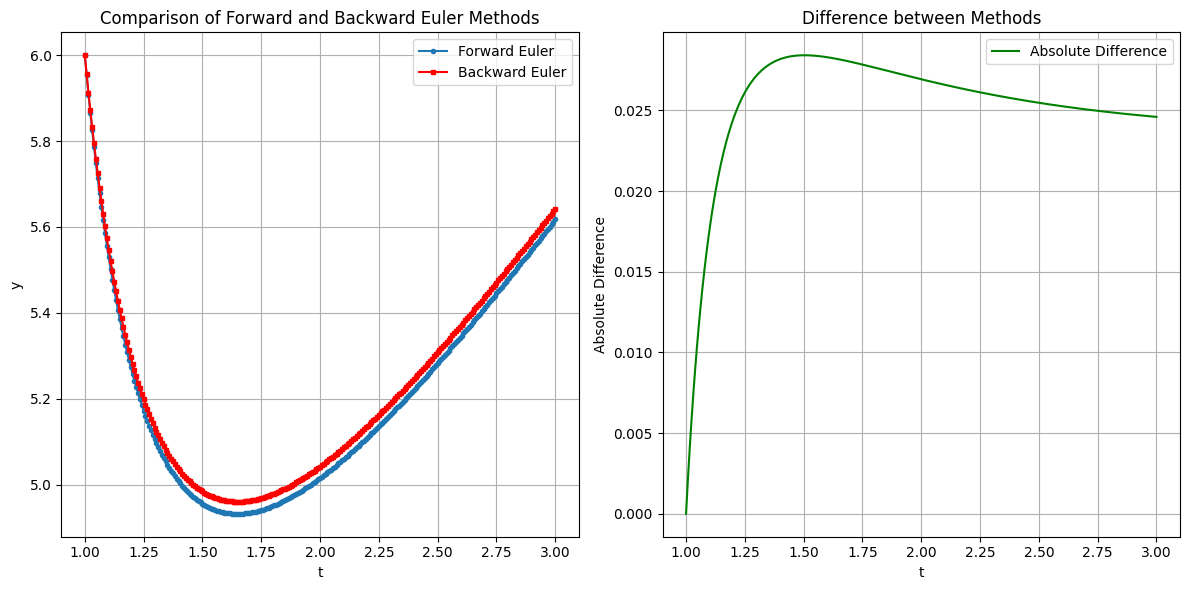

Final values at t = 3:
Forward Euler: 5.617507926313271
Backward Euler: 5.642106058029334


In [3]:
# Q4
import numpy as np
import matplotlib.pyplot as plt

def f(t, y):
    # 微分方程：y' = t^(-2)*(t*y - y^2/3) = y/t - y^2/(3*t^2)
    return y/t - y**2/(3*t**2)

# 前向欧拉法
def forward_euler(y0, t0, t_end, h):
    N = int((t_end - t0) / h)
    t_vals = np.zeros(N+1)
    y_vals = np.zeros(N+1)
    t_vals[0] = t0
    y_vals[0] = y0
    for n in range(N):
        t_n = t_vals[n]
        y_n = y_vals[n]
        y_vals[n+1] = y_n + h * f(t_n, y_n)
        t_vals[n+1] = t_n + h
    return t_vals, y_vals

# 后向欧拉法（解隐式方程得到二次方程）
def backward_euler(y0, t0, t_end, h):
    N = int((t_end - t0) / h)
    t_vals = np.zeros(N+1)
    y_vals = np.zeros(N+1)
    t_vals[0] = t0
    y_vals[0] = y0
    for n in range(N):
        t_next = t_vals[n] + h
        y_n = y_vals[n]
        # 隐式方程：y_{n+1} = y_n + h*(y_{n+1}/t_next - y_{n+1}^2/(3*t_next^2))
        # 整理为： (h/(3*t_next**2)) y_{n+1}^2 + (1 - h/t_next)y_{n+1} - y_n = 0
        A = h / (3 * t_next**2)
        B = 1 - h / t_next
        C = - y_n
        
        disc = B**2 - 4 * A * C  # 判别式
        # 选择满足物理意义的正根
        y_next = (-B + np.sqrt(disc)) / (2 * A)
        
        y_vals[n+1] = y_next
        t_vals[n+1] = t_next
    return t_vals, y_vals

# 参数设置
y0 = 6
t0 = 1
t_end = 3
h = 1/128

# 计算数值解
t_fe, y_fe = forward_euler(y0, t0, t_end, h)
t_be, y_be = backward_euler(y0, t0, t_end, h)

# 可视化部分
plt.figure(figsize=(12, 6))

# 子图1：两种方法的数值解对比
plt.subplot(1, 2, 1)
plt.plot(t_fe, y_fe, label="Forward Euler", marker='o', markersize=3)
plt.plot(t_be, y_be, label="Backward Euler", marker='s', markersize=3, color='red')
plt.xlabel("t")
plt.ylabel("y")
plt.title("Comparison of Forward and Backward Euler Methods")
plt.legend()
plt.grid(True)

# 子图2：两种方法的数值解差值
plt.subplot(1, 2, 2)
plt.plot(t_fe, np.abs(y_fe - y_be), label="Absolute Difference", color='green')
plt.xlabel("t")
plt.ylabel("Absolute Difference")
plt.title("Difference between Methods")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

print("Final values at t = 3:")
print(f"Forward Euler: {y_fe[-1]}")
print(f"Backward Euler: {y_be[-1]}")